Default AdaBoost Accuracy (n_estimators=10): 0.8277
Best AdaBoost Accuracy: 0.8310 with n_estimators=42


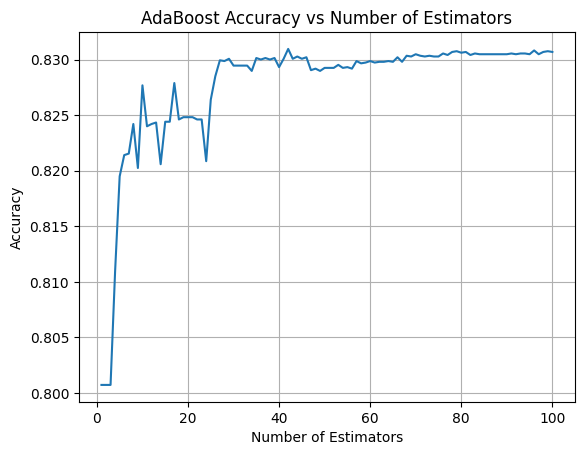

In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("income.csv")

# Preprocess (basic handling - encode categorical features)
df = df.dropna()  # drop missing values if any
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. AdaBoost with 10 estimators
model_default = AdaBoostClassifier(n_estimators=10, random_state=42)
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print(f"Default AdaBoost Accuracy (n_estimators=10): {default_score:.4f}")

# 2. Fine-tune number of estimators
best_score = 0
best_n = 0
scores = []

for n in range(1, 101):
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n

print(f"Best AdaBoost Accuracy: {best_score:.4f} with n_estimators={best_n}")

# Plot accuracy vs number of estimators
plt.plot(range(1, 101), scores)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.grid(True)
plt.show()
